# Libraries and Data

In [2]:
# Load packages and libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Load dataset and create DataFrame
df = pd.read_csv('D600 Task 2 Dataset 1 Housing Information.csv')
df.head().T

,0,1,2,3,4
ID,4922,5009,4450,1070,400
Price,255614.8992,155586.0947,131050.8324,151361.7125,113167.6128
SquareFootage,566.62,1472.34,550.0,941.81,550.0
NumBathrooms,1.0,1.0,1.779354,2.035254,1.064644
NumBedrooms,4,2,3,2,3
BackyardSpace,779.42,656.13,754.57,439.59,353.03
CrimeRate,20.56,15.62,12.47,22.22,8.28
SchoolRating,5.62,5.63,9.2,7.08,5.93
AgeOfHome,39.46,40.51,48.38,94.67,16.8
DistanceToCityCenter,10.08,7.89,23.74,5.22,43.13


In [4]:
# Information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7000 non-null   int64  
 1   Price                 7000 non-null   float64
 2   SquareFootage         7000 non-null   float64
 3   NumBathrooms          7000 non-null   float64
 4   NumBedrooms           7000 non-null   int64  
 5   BackyardSpace         7000 non-null   float64
 6   CrimeRate             7000 non-null   float64
 7   SchoolRating          7000 non-null   float64
 8   AgeOfHome             7000 non-null   float64
 9   DistanceToCityCenter  7000 non-null   float64
 10  EmploymentRate        7000 non-null   float64
 11  PropertyTaxRate       7000 non-null   float64
 12  RenovationQuality     7000 non-null   float64
 13  LocalAmenities        7000 non-null   float64
 14  TransportAccess       7000 non-null   float64
 15  Fireplace            

In [5]:
# Data Wrangling
# Map 'Fireplace' values: 'No': 0, 'Yes': 1
df['Fireplace'] = df['Fireplace'].map({'No': 0, 'Yes': 1})

# Map 'Garage' values: 'No': 0, 'Yes': 1
df['Garage'] = df['Garage'].map({'No': 0, 'Yes': 1})

# Change data type of 'Fireplace' and 'Garage' to int
df['Fireplace'] = df['Fireplace'].astype(int)
df['Garage'] = df['Garage'].astype(int)

# Drop unnecessary columns
df.drop(columns=['HouseColor'], axis=1, inplace=True)

# Review DataFrame
df.head().T

,0,1,2,3,4
ID,4922.0000,5009.00000,4450.000000,1070.000000,400.000000
Price,255614.8992,155586.09470,131050.832400,151361.712500,113167.612800
SquareFootage,566.6200,1472.34000,550.000000,941.810000,550.000000
NumBathrooms,1.0000,1.00000,1.779354,2.035254,1.064644
NumBedrooms,4.0000,2.00000,3.000000,2.000000,3.000000
BackyardSpace,779.4200,656.13000,754.570000,439.590000,353.030000
CrimeRate,20.5600,15.62000,12.470000,22.220000,8.280000
SchoolRating,5.6200,5.63000,9.200000,7.080000,5.930000
AgeOfHome,39.4600,40.51000,48.380000,94.670000,16.800000
DistanceToCityCenter,10.0800,7.89000,23.740000,5.220000,43.130000


<Axes: >

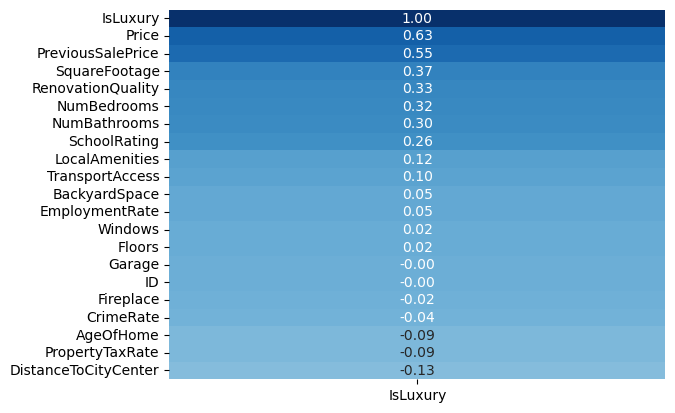

In [6]:
# Create a heatmap to visualize correlations with 'IsLuxury'
# (McCoy 2024)
sns.heatmap(data=df.corr()[['IsLuxury']].sort_values(by='IsLuxury', 
                                                     ascending=False), annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

# C. Data Preparation Summary

## C1. Variable Identification

- Dependent variable: `IsLuxury`
- Independent variables: `SquareFootage`, `NumBedrooms`, `CrimeRate`, `SchoolRating`, `PropertyTax`, `AgeOfHome`

## C2. Descriptive Statistics

In [7]:
# Dependent variable: 'IsLuxury'
# Independent variables: 'SquareFootage', 'NumBedrooms', 'CrimeRate',
# 'SchoolRating', 'PropertyTaxRate', 'AgeOfHome'
var_cols = ['IsLuxury', 'SquareFootage', 'NumBedrooms', 'CrimeRate',
            'SchoolRating', 'PropertyTaxRate', 'AgeOfHome']
var_cols

['IsLuxury',
 'SquareFootage',
 'NumBedrooms',
 'CrimeRate',
 'SchoolRating',
 'PropertyTaxRate',
 'AgeOfHome']

In [8]:
# Descriptive statistics of chosen variables
housing_df = df[var_cols]
housing_df.describe()

,IsLuxury,SquareFootage,NumBedrooms,CrimeRate,SchoolRating,PropertyTaxRate,AgeOfHome
count,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.50400,1048.947459,3.008571,31.226194,6.942923,1.500437,46.797046
std,0.50002,426.010482,1.021940,18.025327,1.888148,0.498591,31.779701
min,0.00000,550.000000,1.000000,0.030000,0.220000,0.010000,0.010000
25%,0.00000,660.815000,2.000000,17.390000,5.650000,1.160000,20.755000
50%,1.00000,996.320000,3.000000,30.385000,7.010000,1.490000,42.620000
75%,1.00000,1342.292500,4.000000,43.670000,8.360000,1.840000,67.232500
max,1.00000,2874.700000,7.000000,99.730000,10.000000,3.360000,178.680000


In [9]:
# Check for binary nature of 'IsLuxury'
print(housing_df['IsLuxury'].unique())

# Proportions of 'IsLuxury'
housing_df['IsLuxury'].value_counts(normalize=True)

[0 1]


IsLuxury
1    0.504
0    0.496
Name: proportion, dtype: float64

## C3. Visualizations

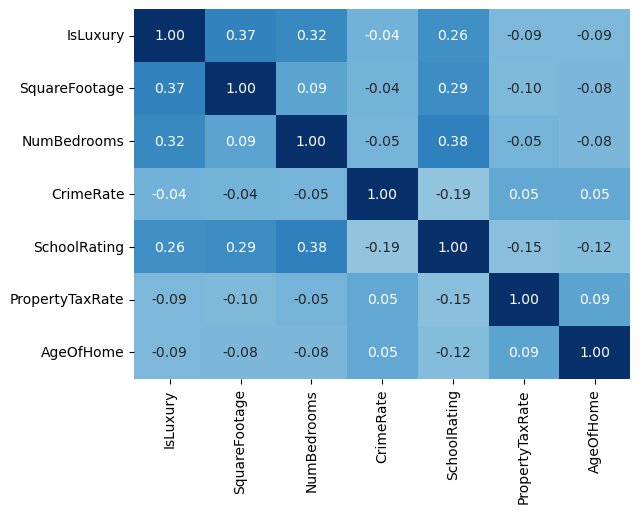

In [11]:
# Correlation of subset variables
sns.heatmap(data=housing_df.corr(), annot=True, cmap='Blues', vmin=-1.0, 
            vmax=1.0, cbar=False, fmt='.2f');

### Univariate Visualizations

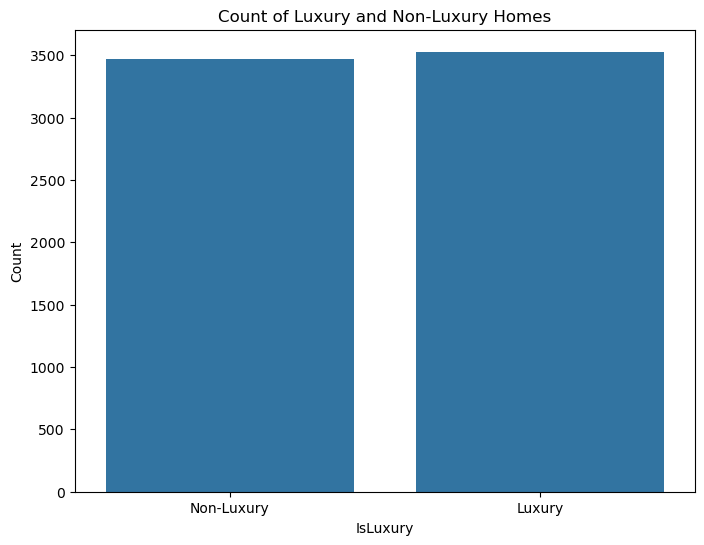

In [13]:
# Count plot of 'IsLuxury' distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=housing_df, x='IsLuxury')
plt.title('Count of Luxury and Non-Luxury Homes')
plt.xlabel('IsLuxury')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Luxury', 'Luxury'])
plt.show()

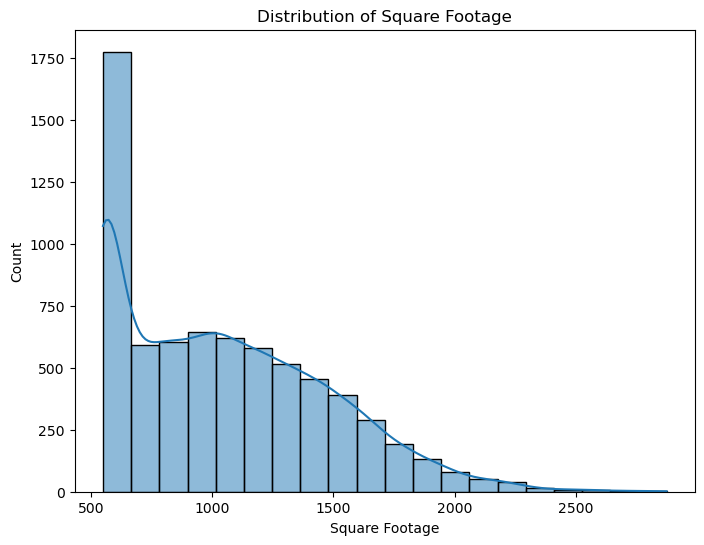

In [14]:
# Histogram of 'SquareFootage'
plt.figure(figsize=(8, 6))
sns.histplot(data=housing_df, x='SquareFootage', bins=20, kde=True)
plt.title('Distribution of Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Count')
plt.show()

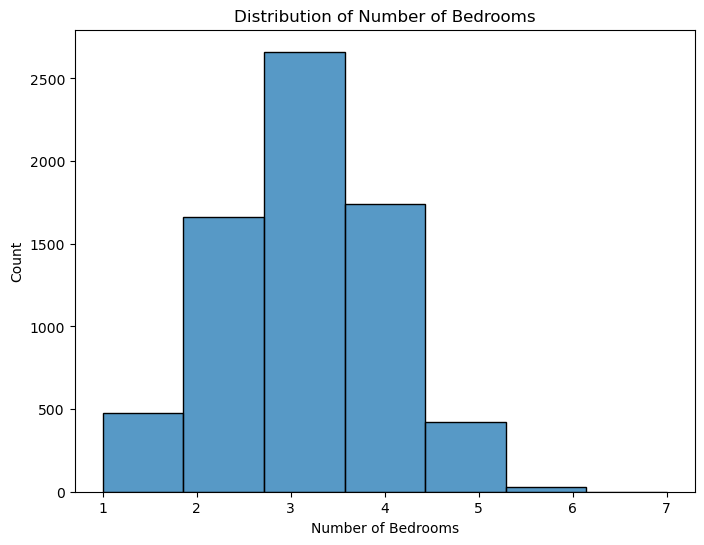

In [15]:
# Histogram of 'NumBedrooms'
plt.figure(figsize=(8, 6))
sns.histplot(data=housing_df, x='NumBedrooms', bins=7)
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

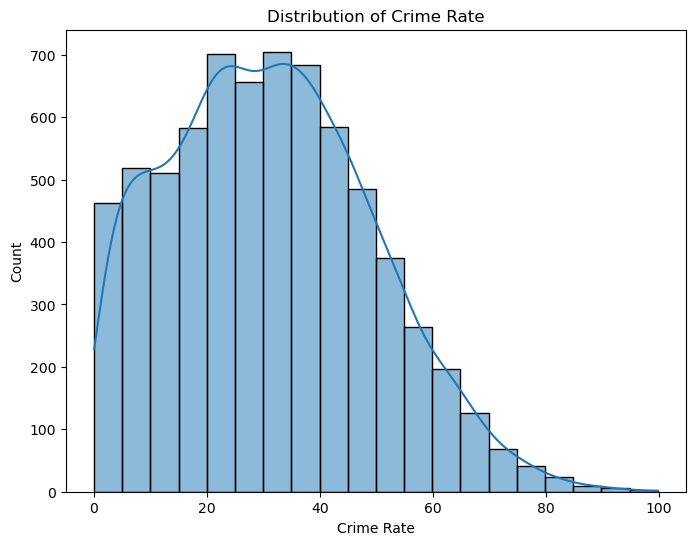

In [16]:
# Histogram of 'CrimeRate'
plt.figure(figsize=(8, 6))
sns.histplot(data=housing_df, x='CrimeRate', bins=20, kde=True)
plt.title('Distribution of Crime Rate')
plt.xlabel('Crime Rate')
plt.ylabel('Count')
plt.show()

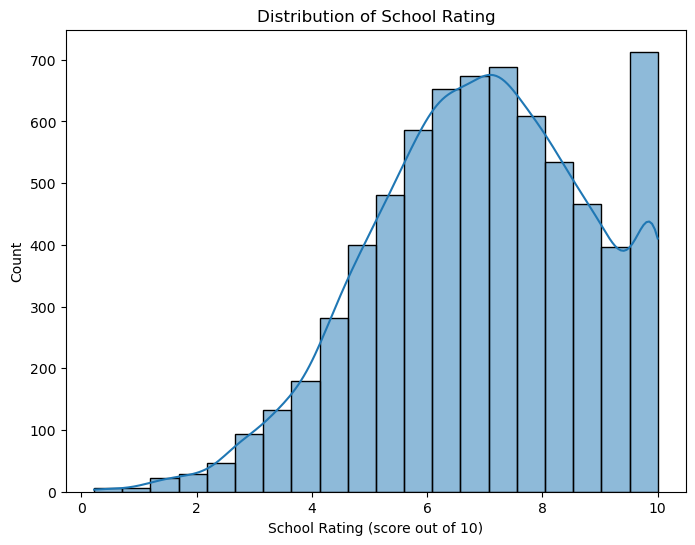

In [18]:
# Histogram of 'SchoolRating'
plt.figure(figsize=(8, 6))
sns.histplot(data=housing_df, x='SchoolRating', bins=20, kde=True)
plt.title('Distribution of School Rating')
plt.xlabel('School Rating (score out of 10)')
plt.ylabel('Count')
plt.show()

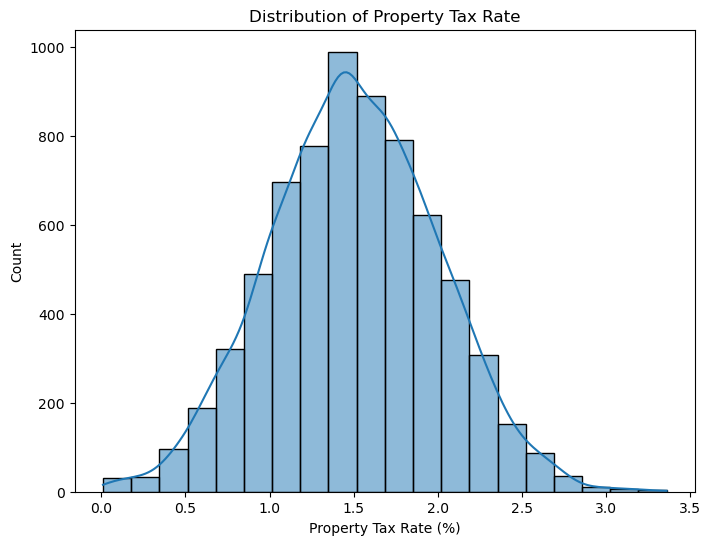

In [20]:
# Histogram of 'PropertyTaxRate'
plt.figure(figsize=(8, 6))
sns.histplot(data=housing_df, x='PropertyTaxRate', bins=20, kde=True)
plt.title('Distribution of Property Tax Rate')
plt.xlabel('Property Tax Rate (%)')
plt.ylabel('Count')
plt.show()

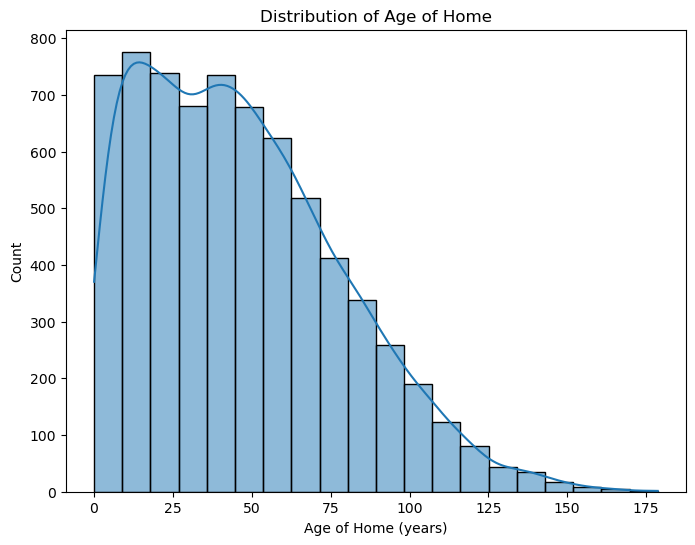

In [23]:
# Histogram of 'AgeOfHome'
plt.figure(figsize=(8, 6))
sns.histplot(data=housing_df, x='AgeOfHome', bins=20, kde=True)
plt.title('Distribution of Age of Home')
plt.xlabel('Age of Home (years)')
plt.ylabel('Count')
plt.show()

### Bivariate Visualizations

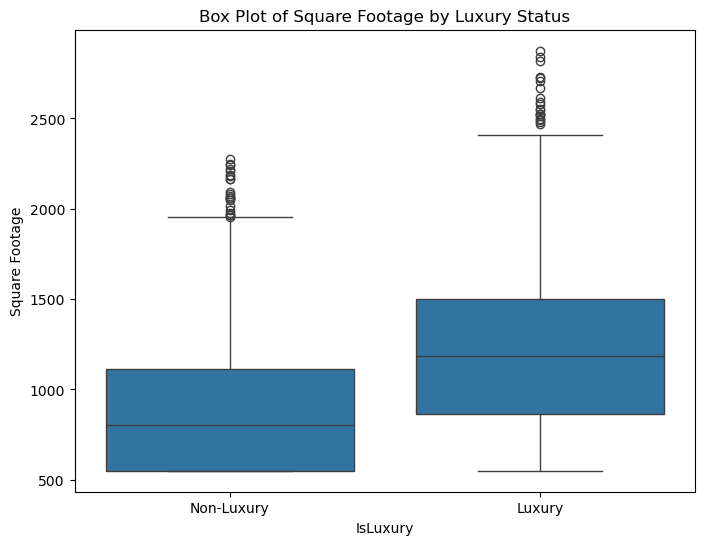

In [24]:
# Box plot for 'SquareFootage' vs. 'IsLuxury'
plt.figure(figsize=(8, 6))
sns.boxplot(data=housing_df, x='IsLuxury', y='SquareFootage')
plt.title('Box Plot of Square Footage by Luxury Status')
plt.xlabel('IsLuxury')
plt.ylabel('Square Footage')
plt.xticks([0, 1], ['Non-Luxury', 'Luxury'])
plt.show()

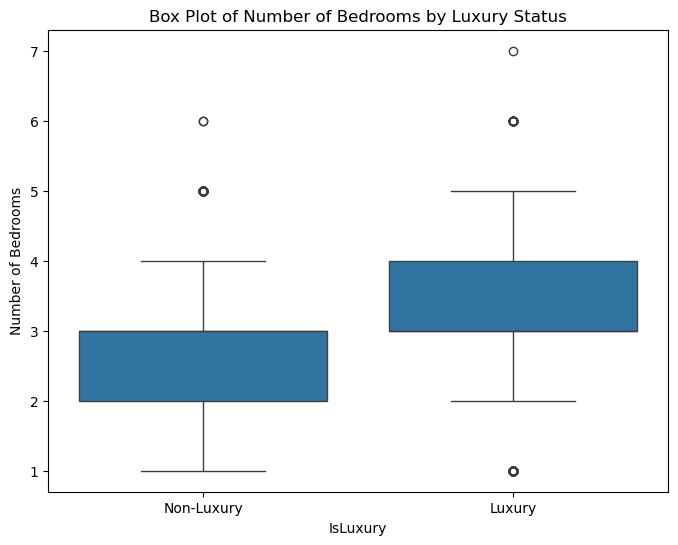

In [25]:
# Box plot for 'NumBedrooms' vs. 'IsLuxury'
plt.figure(figsize=(8, 6))
sns.boxplot(data=housing_df, x='IsLuxury', y='NumBedrooms')
plt.title('Box Plot of Number of Bedrooms by Luxury Status')
plt.xlabel('IsLuxury')
plt.ylabel('Number of Bedrooms')
plt.xticks([0, 1], ['Non-Luxury', 'Luxury'])
plt.show()

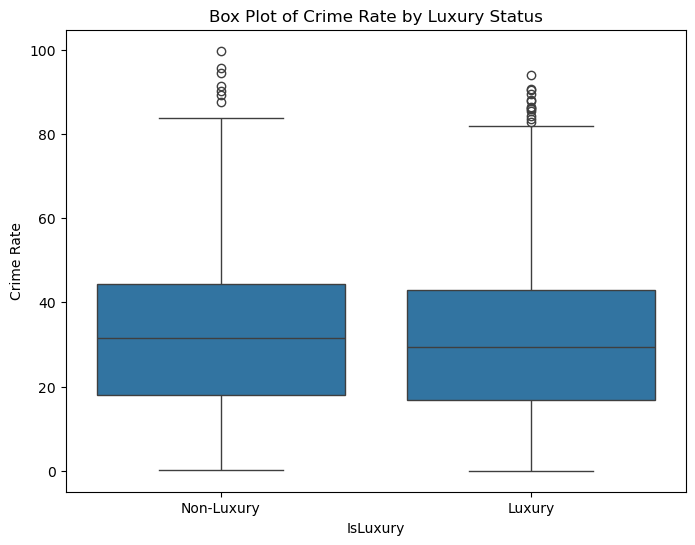

In [26]:
# Box plot for 'CrimeRate' vs. 'IsLuxury'
plt.figure(figsize=(8, 6))
sns.boxplot(data=housing_df, x='IsLuxury', y='CrimeRate')
plt.title('Box Plot of Crime Rate by Luxury Status')
plt.xlabel('IsLuxury')
plt.ylabel('Crime Rate')
plt.xticks([0, 1], ['Non-Luxury', 'Luxury'])
plt.show()

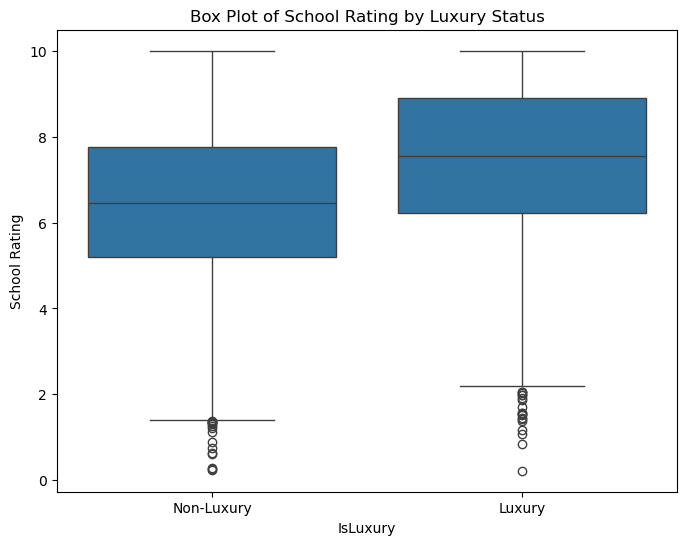

In [27]:
# Box plot of 'SchoolRating' vs. 'IsLuxury'
plt.figure(figsize=(8, 6))
sns.boxplot(data=housing_df, x='IsLuxury', y='SchoolRating')
plt.title('Box Plot of School Rating by Luxury Status')
plt.xlabel('IsLuxury')
plt.ylabel('School Rating')
plt.xticks([0, 1], ['Non-Luxury', 'Luxury'])
plt.show()

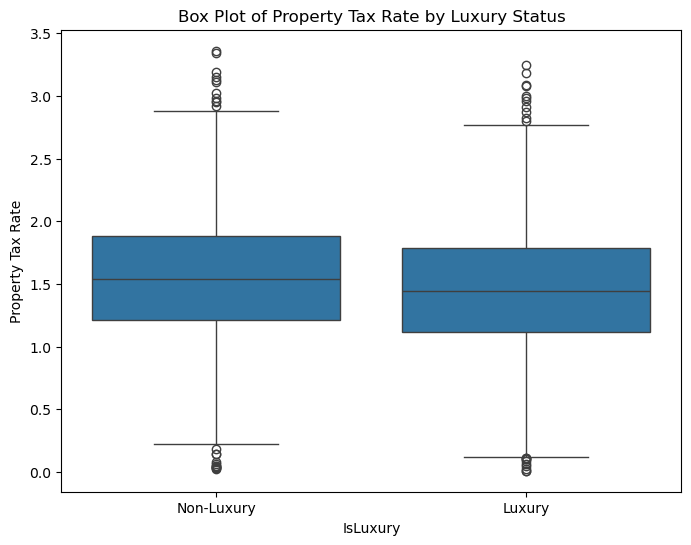

In [28]:
# Box plot of 'PropertyTaxRate' vs. 'IsLuxury'
plt.figure(figsize=(8, 6))
sns.boxplot(data=housing_df, x='IsLuxury', y='PropertyTaxRate')
plt.title('Box Plot of Property Tax Rate by Luxury Status')
plt.xlabel('IsLuxury')
plt.ylabel('Property Tax Rate')
plt.xticks([0, 1], ['Non-Luxury', 'Luxury'])
plt.show()

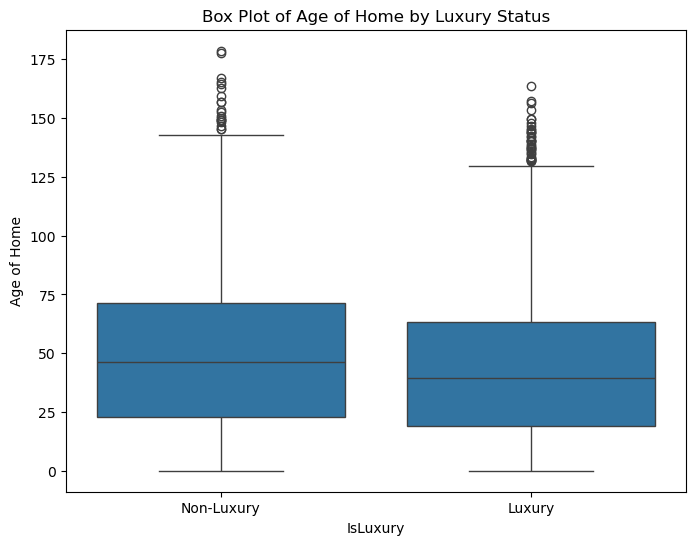

In [29]:
# Box plot of 'AgeOfHome' vs. 'IsLuxury'
plt.figure(figsize=(8, 6))
sns.boxplot(data=housing_df, x='IsLuxury', y='AgeOfHome')
plt.title('Box Plot of Age of Home by Luxury Status')
plt.xlabel('IsLuxury')
plt.ylabel('Age of Home')
plt.xticks([0, 1], ['Non-Luxury', 'Luxury'])
plt.show()

# D. Data Analysis

## D1. Splitting the Data

In [30]:
# Define the independent variables
X = housing_df.drop('IsLuxury', axis=1)

# Define the dependent variable
y = housing_df['IsLuxury']

In [31]:
# Split the data into training and test sets
# 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add a constant to the independent variables
X_train = sm.add_constant(X_train)

# Fit the Logistic Regression model from statsmodels
logit_model = sm.Logit(y_train, X_train).fit()

# Print the summary of the model
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.570668
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               IsLuxury   No. Observations:                 4900
Model:                          Logit   Df Residuals:                     4893
Method:                           MLE   Df Model:                            6
Date:                Fri, 14 Feb 2025   Pseudo R-squ.:                  0.1765
Time:                        13:47:01   Log-Likelihood:                -2796.3
converged:                       True   LL-Null:                       -3395.7
Covariance Type:            nonrobust   LLR p-value:                8.777e-256
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.0501      0.223    -18.139      0.000      -4.488      -3.613
SquareFootage 

In [ ]:
# Predicting probabilities on the training set prior to model optimization
y_train_pred_probs = logit_model.predict(X_train)

# Convert probabilities to binary outcomes
y_train_pred = np.where(y_train_pred_probs > 0.5, 1, 0)

In [ ]:
# Predicting probabilities on the test set prior to model optimization
y_test_pred_probs = logit_model.predict(sm.add_constant(X_test))

# Convert probabilities to binary outcomes
y_test_pred = np.where(y_test_pred_probs > 0.5, 1, 0)

In [36]:
# Compare actual vs. predicted values as a DataFrame
train_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
train_results.head(10)

,Actual,Predicted
6500,1,1
2944,0,0
2024,0,0
263,0,0
4350,1,1
3424,0,0
6748,1,1
6215,0,1
6362,1,0
5589,1,0


## D2. Model Optimization


In [37]:
# Define a function to perform Backward Elimination on the Logistic Regression
# model for optimization
def backward_elimination(X, y, significance_level=0.05):
    # Add a constant to the independent variables
    X = sm.add_constant(X)
    
    # Fit the initial model
    model = sm.Logit(y, X).fit()
    
    # Get the p-values of the independent variables
    p_values = model.pvalues[1:]
    
    # Perform backward elimination
    while p_values.max() > significance_level:
        # Remove the variable with the highest p-value
        X = X.drop(columns=[p_values.idxmax()])
        
        # Fit the model again
        model = sm.Logit(y, X).fit()
        
        # Update the p-values
        p_values = model.pvalues
    
    return model

In [38]:
# Perform Backward Elimination on the Logistic Regression model
optimized_model = backward_elimination(X_train, y_train)

# Print the summary of the optimized model
print(optimized_model.summary())

Optimization terminated successfully.
         Current function value: 0.570668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570677
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               IsLuxury   No. Observations:                 4900
Model:                          Logit   Df Residuals:                     4894
Method:                           MLE   Df Model:                            5
Date:                Fri, 14 Feb 2025   Pseudo R-squ.:                  0.1765
Time:                        13:54:28   Log-Likelihood:                -2796.3
converged:                       True   LL-Null:                       -3395.7
Covariance Type:            nonrobust   LLR p-value:                5.632e-257
                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

In [39]:
# Exponentiate the coefficients to get the odds ratios of a one-unit increaes
# in the independent variables
odds_ratios = np.exp(optimized_model.params)
odds_ratios

const              0.017050
SquareFootage      1.001849
NumBedrooms        1.894336
SchoolRating       1.096259
PropertyTaxRate    0.848144
AgeOfHome          0.997572
dtype: float64

In [ ]:
# Find the reciprocal of 'PropertyTaxRate' and 'AgeOfHome' odds ratios
reciprocal_odds_ratios = 1 / odds_ratios[['PropertyTaxRate', 'AgeOfHome']]
reciprocal_odds_ratios



PropertyTaxRate    1.179046
AgeOfHome          1.002434
dtype: float64

## D3. Confusion Matrix & Accuracy

In [43]:
# Accuracy scores to two decimal places
train_accuracy = round(accuracy_score(y_train, y_train_pred), 2)
test_accuracy = round(accuracy_score(y_test, y_test_pred), 2)

# Print the accuracy scores
print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.72
Test Accuracy: 0.72


In [45]:
# Confusion matrix of the optimized model used on the training set
cm_train = confusion_matrix(y_train, y_train_pred)

# Print confusion matrix
print('Training Confusion Matrix:')
print(cm_train)

Training Confusion Matrix:
[[1740  667]
 [ 715 1778]]


## D4. Prediction

In [46]:
# Run the predictions of the test data on the optimized model
# Get the features used in the optimized model (excluding the constant)
optimized_features = optimized_model.params.index[1:]

# Select only these features from X_test and add a constant
X_test_optimized = sm.add_constant(X_test[optimized_features])

# Predict the probabilities on the test set using the optimized model
y_test_pred_probs_optimized = optimized_model.predict(X_test_optimized)

# Convert probabilities to binary outcomes
y_test_pred_optimized = np.where(y_test_pred_probs_optimized > 0.5, 1, 0)

In [47]:
# Create a DataFrame for the results
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_optimized})
test_results.head(10)

,Actual,Predicted
6500,1,1
2944,0,0
2024,0,0
263,0,0
4350,1,1
3424,0,0
6748,1,1
6215,0,1
6362,1,0
5589,1,0


In [48]:
# Confusion matrix of the optimized model used on the test set
cm_test = confusion_matrix(y_test, y_test_pred_optimized)

# Print confusion matrix
print('Test Confusion Matrix:')
print(cm_test)

Test Confusion Matrix:
[[754 311]
 [283 752]]


In [49]:
# Accuracy scores of the test data to two decimal places
test_accuracy_optimized = round(accuracy_score(y_test, y_test_pred_optimized), 2)
# Print the accuracy score
print(f'Test Accuracy (Optimized): {test_accuracy_optimized}')

Test Accuracy (Optimized): 0.72


# E. Data Analysis Summary

## E5. Verification of Assumptions

In [51]:
# Check for multicollinearity of independent variables
# Calculate the Variance Inflation Factor (VIF) for each independent variable
vif = pd.DataFrame()
vif['Feature'] = X_test_optimized.columns
vif['VIF'] = [variance_inflation_factor(X_test_optimized.values, i) for i in range(X_test_optimized.shape[1])]
vif

,Feature,VIF
0,const,36.291679
1,SquareFootage,1.100774
2,NumBedrooms,1.152495
3,SchoolRating,1.277883
4,PropertyTaxRate,1.022857
5,AgeOfHome,1.021821
